In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import os
import torch
from fastai import *
from fastai.basics import *
from fastai.callback.all import *
from fastai.metrics import error_rate, accuracy
from fastai.vision import *
from fastai.vision.all import *
from fastai.basics import *
import numpy as np
import pandas as pd
import matplotlib as mlt

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = untar_data(URLs.CIFAR)

In [ ]:
path.ls()

(#3) [Path('/root/.fastai/data/cifar10/train'),Path('/root/.fastai/data/cifar10/test'),Path('/root/.fastai/data/cifar10/labels.txt')]

In [ ]:
(path/"train").ls()

(#10) [Path('/root/.fastai/data/cifar10/train/ship'),Path('/root/.fastai/data/cifar10/train/bird'),Path('/root/.fastai/data/cifar10/train/dog'),Path('/root/.fastai/data/cifar10/train/cat'),Path('/root/.fastai/data/cifar10/train/frog'),Path('/root/.fastai/data/cifar10/train/truck'),Path('/root/.fastai/data/cifar10/train/airplane'),Path('/root/.fastai/data/cifar10/train/deer'),Path('/root/.fastai/data/cifar10/train/automobile'),Path('/root/.fastai/data/cifar10/train/horse')]

In [ ]:
(path/"test").ls()

(#10) [Path('/root/.fastai/data/cifar10/test/ship'),Path('/root/.fastai/data/cifar10/test/bird'),Path('/root/.fastai/data/cifar10/test/dog'),Path('/root/.fastai/data/cifar10/test/cat'),Path('/root/.fastai/data/cifar10/test/frog'),Path('/root/.fastai/data/cifar10/test/truck'),Path('/root/.fastai/data/cifar10/test/airplane'),Path('/root/.fastai/data/cifar10/test/deer'),Path('/root/.fastai/data/cifar10/test/automobile'),Path('/root/.fastai/data/cifar10/test/horse')]

In [ ]:
bs = 1024

In [ ]:
data = ImageDataLoaders.from_folder(path, valid='test', bs=bs)

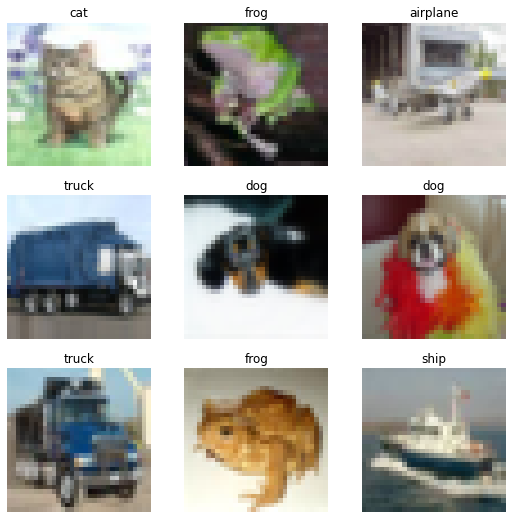

In [ ]:
data.show_batch()

In [ ]:
learn = cnn_learner(data, models.resnet152, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth


  0%|          | 0.00/230M [00:00<?, ?B/s]

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

SuggestedLRs(valley=0.0008317637839354575)

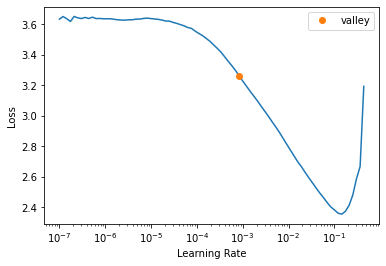

In [ ]:
learn.lr_find()

In [ ]:
learn.fit_one_cycle(10, 1e-3)

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs


epoch,train_loss,valid_loss,accuracy,time
0,2.650902,1.643525,0.476200,00:56
1,1.890842,1.242871,0.584100,00:54
2,1.418151,1.028219,0.645700,00:55
3,1.139668,0.930579,0.676000,00:55
4,0.967278,0.880903,0.694800,00:56
5,0.836589,0.895900,0.707300,00:57
6,0.736897,0.836766,0.711600,00:54
7,0.657611,0.838412,0.714000,00:55
8,0.600625,0.829924,0.714600,00:55
9,0.565075,0.831464,0.715000,00:56


In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(5, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.473131,1.757180,0.713300,00:59
1,0.460120,0.542670,0.819400,01:00
2,0.292901,0.497551,0.844100,00:59
3,0.149792,0.564803,0.857100,01:01
4,0.065076,0.556639,0.863700,00:59


In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(7, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.058959,2.735122,0.801900,01:01
1,0.273681,0.598998,0.820400,00:59
2,0.221253,0.561102,0.832500,00:59
3,0.140781,0.632265,0.840600,01:00
4,0.075180,0.648447,0.851500,01:00
5,0.033231,0.643178,0.862300,01:00
6,0.013787,0.648956,0.862200,00:59


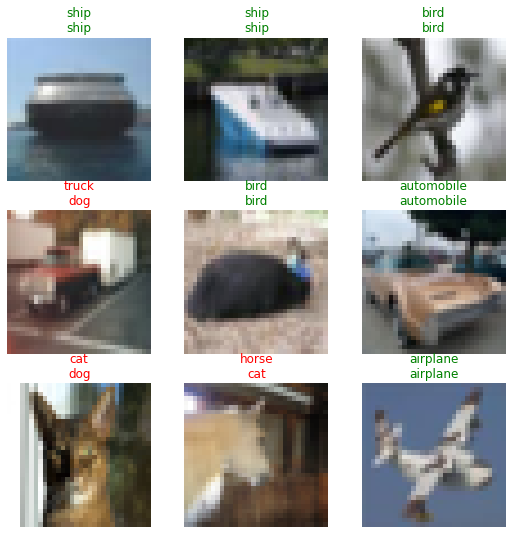

In [ ]:
learn.show_results()